In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_tree, plot_importance
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


The goal of our analysis is to predict the activity the user is doing depending by the stats analyzed by the sportwatch

In [2]:
data = pd.read_csv('../input/apple-watch-and-fitbit-data/aw_fb_data.csv')
data.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


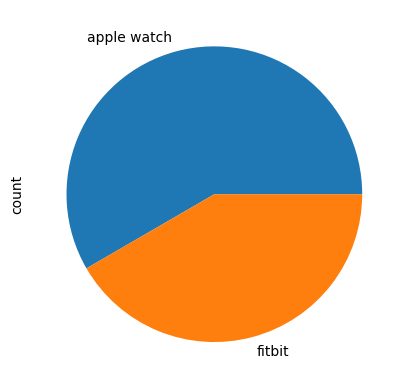

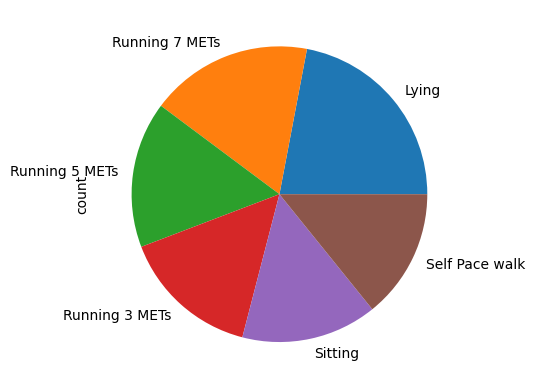

In [3]:
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie()
#we plot categorical variables before transforming

In [4]:
#devices and activities are categorical, we need to transform them in dummies to make a corr matrix
devices = pd.get_dummies(data['device'], prefix='device_')
activities = pd.get_dummies(data['activity'], prefix='activity_')
data = pd.concat([data, devices, activities], axis=1)
data = data.drop(columns=['device', 'activity'])

Correlation Matrix to see the relationship between variables

<Axes: >

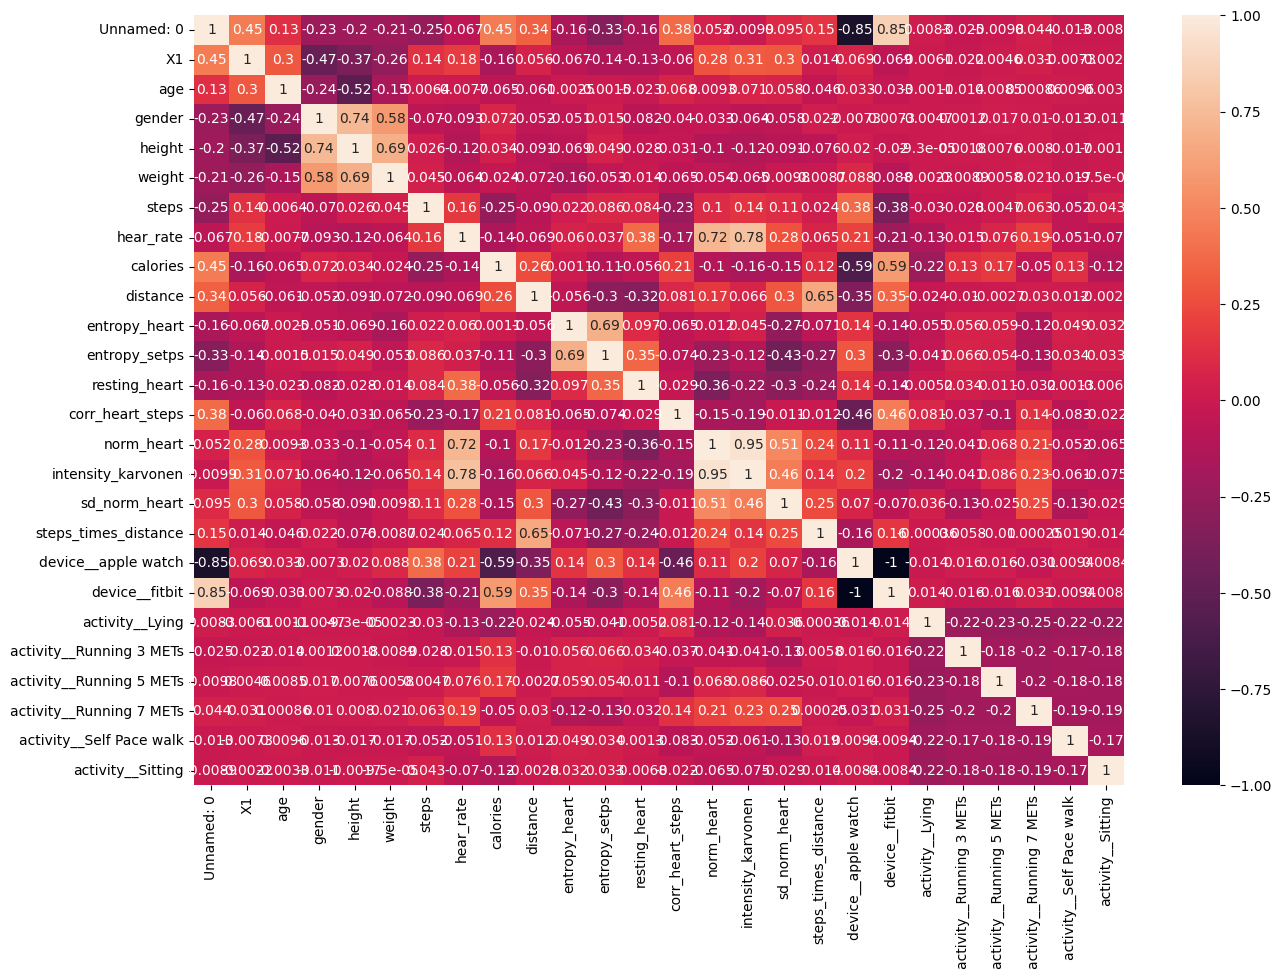

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

Interesting how the brand of the sportwatch literally invert the corr matrix, meaning that in the same identic scenario the sportwatch would give us different measure, so different results.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


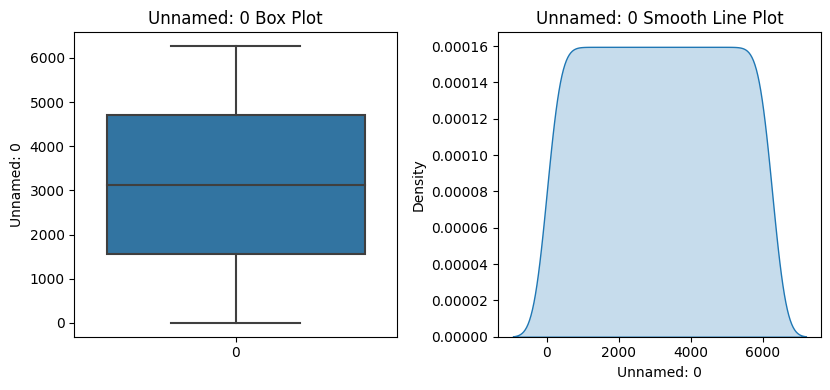

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


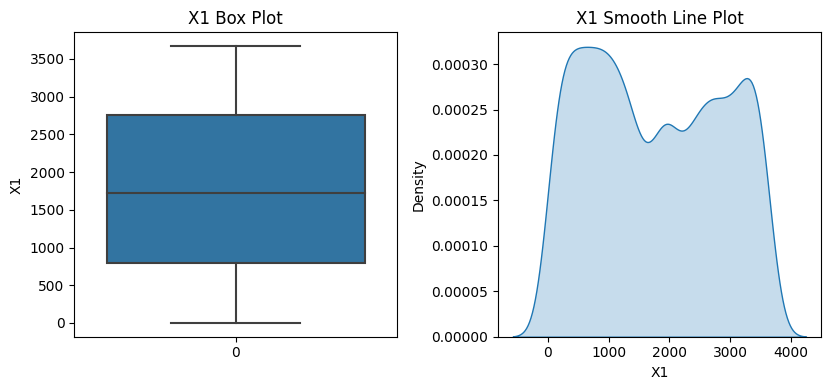

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


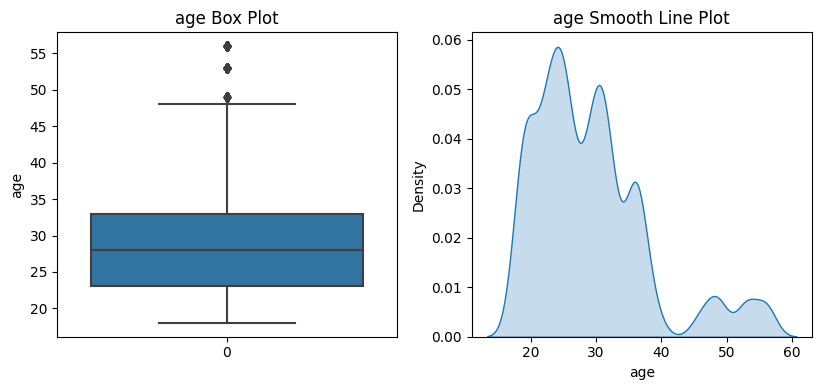

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


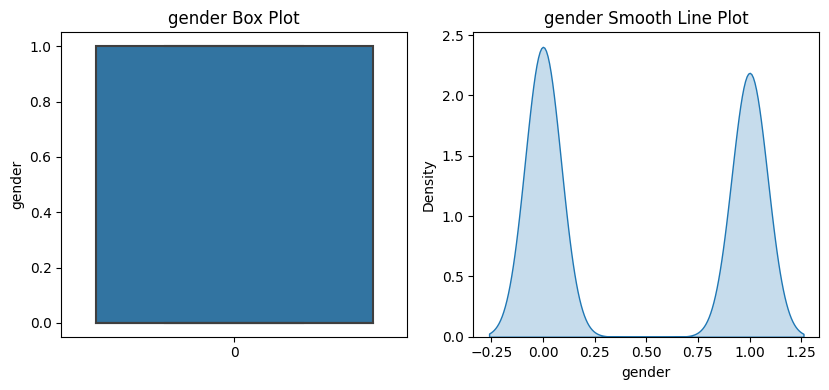

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


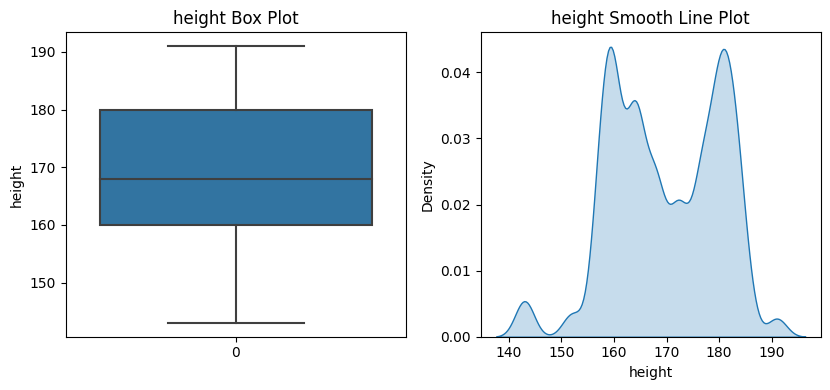

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


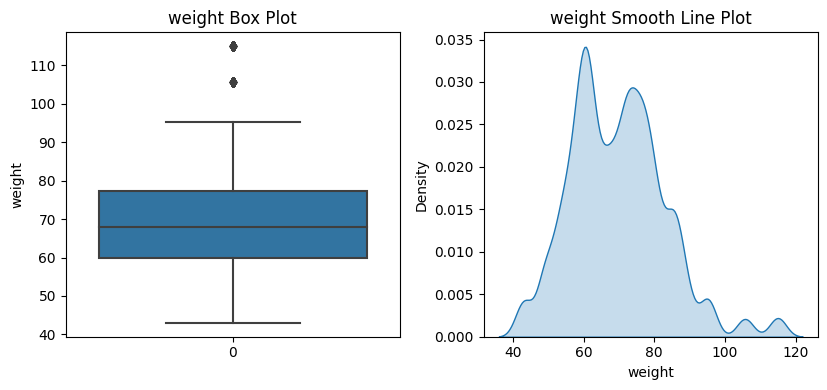

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


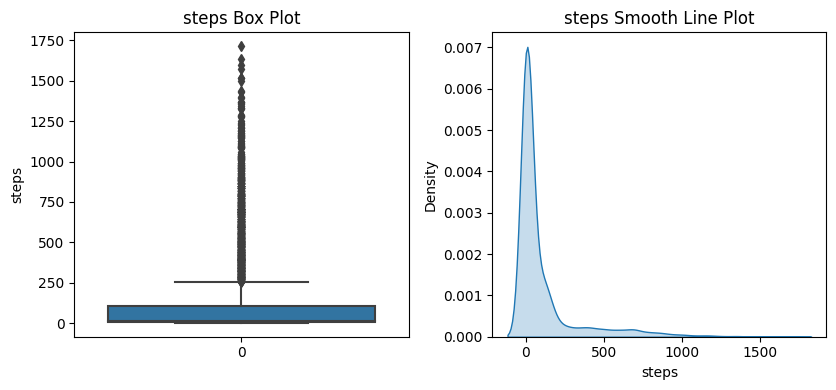

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


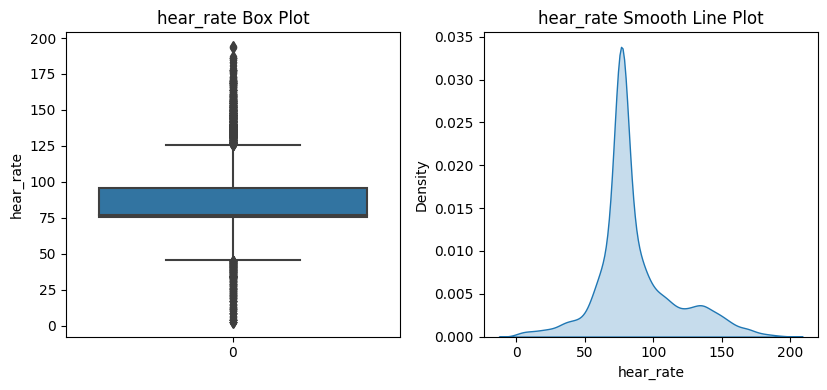

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


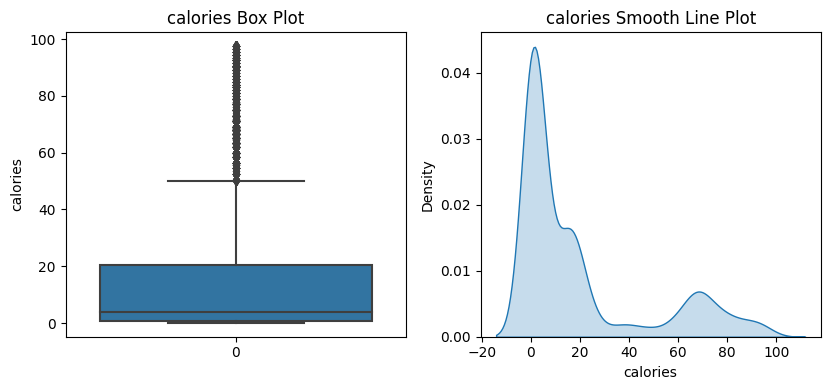

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


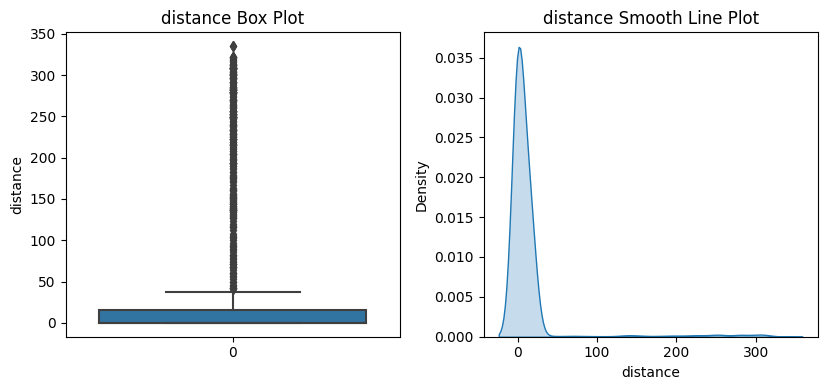

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


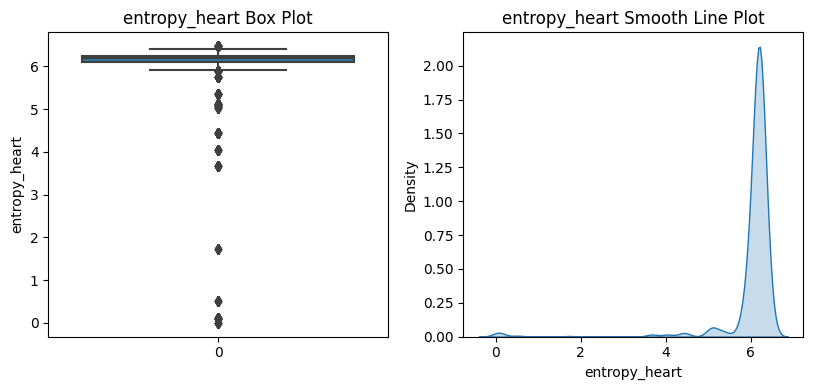

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


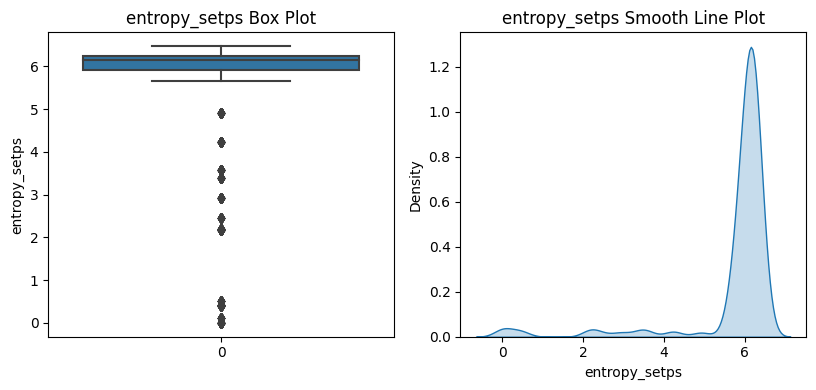

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


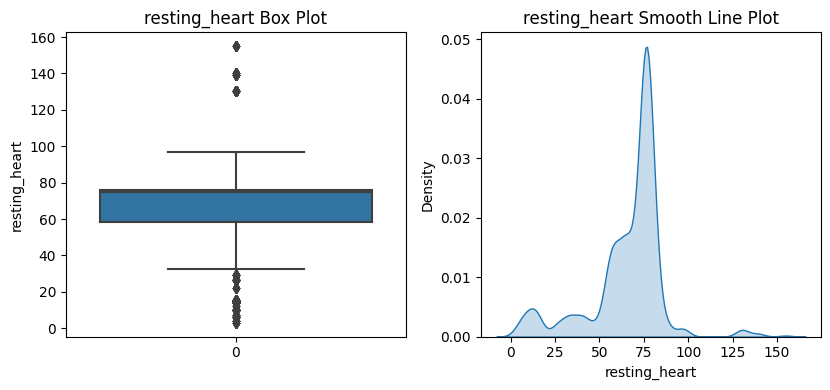

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


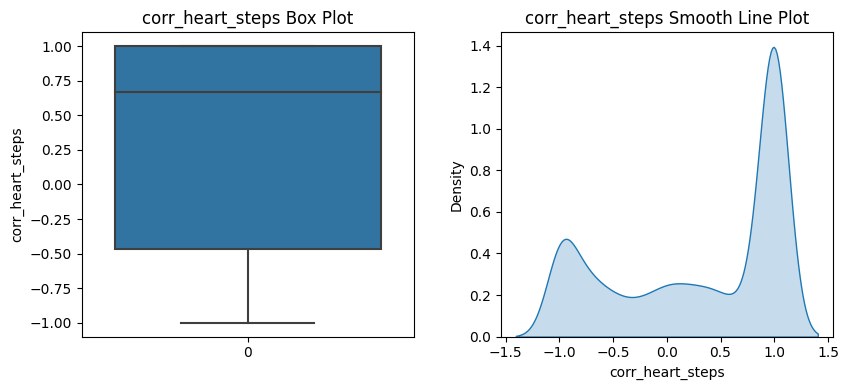

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


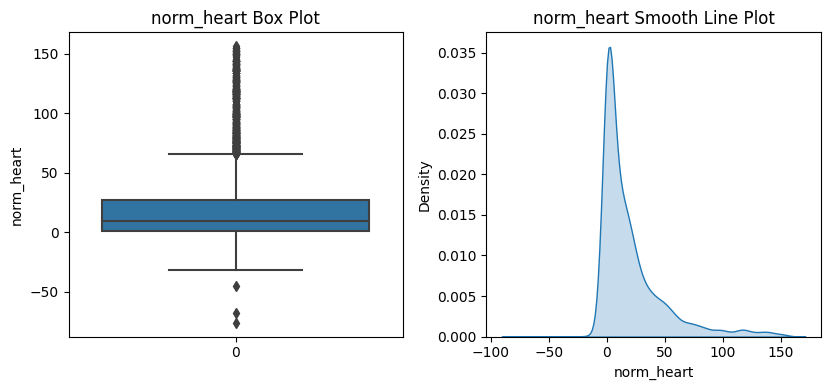

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


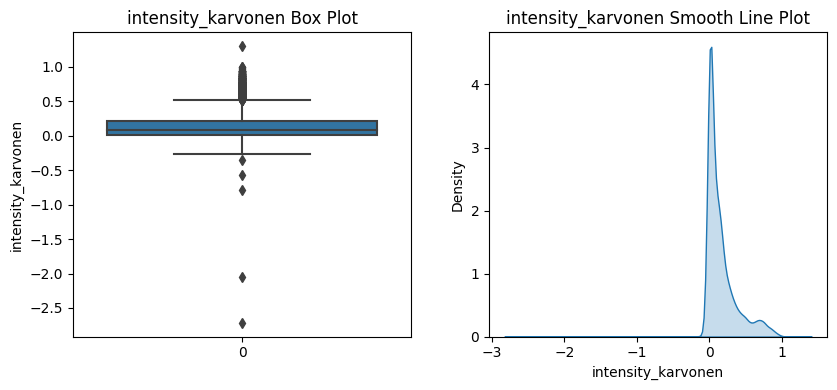

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


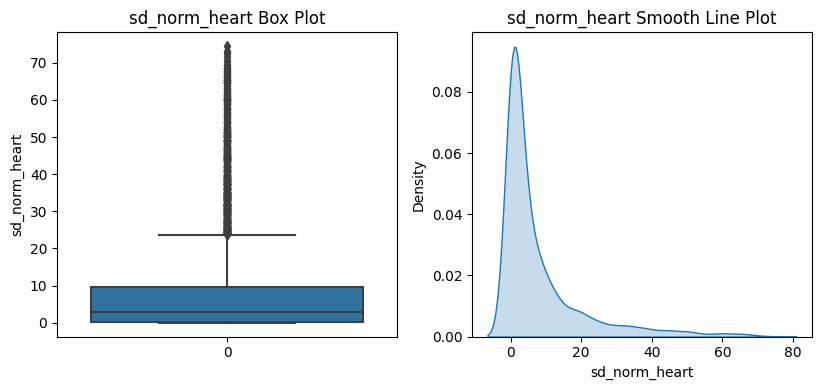

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


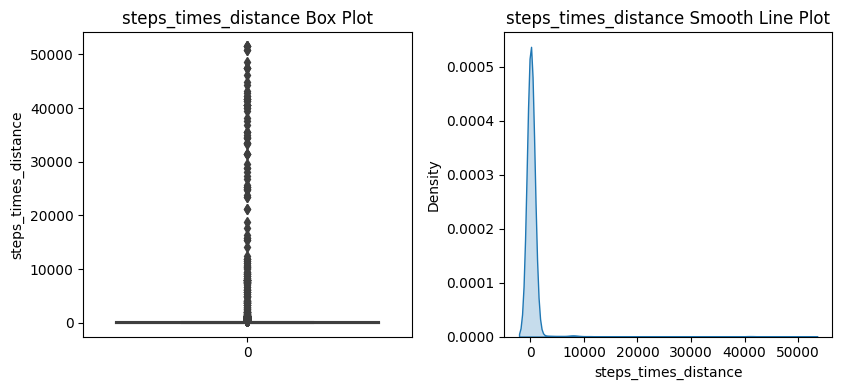

In [6]:
#plot numerical variable using booxplot and histogram (smothing line for an easier visualization)
for col in data.select_dtypes('number'):
    plt.figure(figsize=(12, 4))
        
    # Box plot
    plt.subplot(1, 3, 2)
    sns.boxplot(data[col])
    plt.title(col + ' Box Plot')
    plt.ylabel(col)
    
    # Smooth line plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(data[col], fill=True)
    plt.title(col + ' Smooth Line Plot')
    plt.xlabel(col)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()


# ML model:

In [7]:
#restart our data, we need activity to not be transformed as dummy to do a classification task with multiclass
data = pd.read_csv('../input/apple-watch-and-fitbit-data/aw_fb_data.csv')
devices = pd.get_dummies(data['device'], prefix='device_')
data = pd.concat([data, devices], axis=1)
data = data.drop(columns=['device'])

In [8]:
data.isnull().sum()
#no missing data, no need for imputation tecniques

Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
activity                0
device__apple watch     0
device__fitbit          0
dtype: int64

In [9]:
#split data into train/test using 4/5 rule
X = data.drop(columns=['activity'])  # Features
y = data['activity']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Convert target variable 'activity' to numerical labels using label encoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#We use XGBoost Classifier to maximize our result (we lose something in interpretability but we achieve the max accurancy)
model = XGBClassifier()
model.fit(X_train, y_train_encoded)
y_pred_encoded = model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluation using accurancy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.879489225857941


The accurancy score seams good, we don't want to focus on the ML Model trying different algorithms and hyperparameters since it's just a dimostration on how to use data obtained by sportwatch for ML purpose and analysis

In [11]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
#There doesn't seems to see a misclassified label, our model perform overall good

Classification Report:
                precision    recall  f1-score   support

         Lying       0.86      0.79      0.83       273
Running 3 METs       0.88      0.89      0.88       175
Running 5 METs       0.88      0.93      0.90       208
Running 7 METs       0.95      0.95      0.95       235
Self Pace walk       0.88      0.92      0.90       178
       Sitting       0.82      0.81      0.81       184

      accuracy                           0.88      1253
     macro avg       0.88      0.88      0.88      1253
  weighted avg       0.88      0.88      0.88      1253



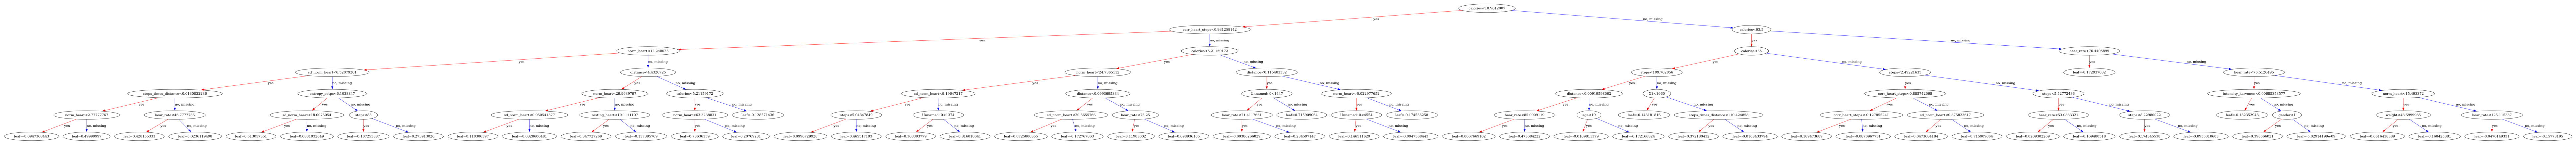

In [12]:
plt.figure(figsize=(100, 100))
plot_tree(model, num_trees=0, ax=plt.gca())
plt.show()
#we visualize the thinking process of the Classifier
#Just to clarify, XGBoost is an ensembling method who put together more decision tree to maximize their performance. It also correct them through Pruning to prevent Overfitting
#It's zoommable

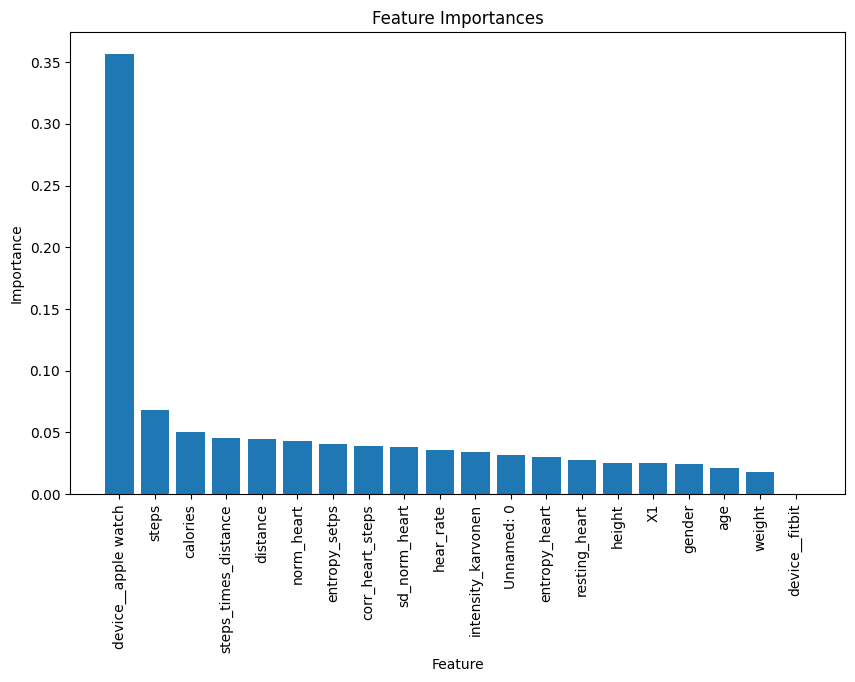

In [13]:
# Feature Importance
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


As said before in the Correlation Matrix, the inverse correlation between the two brands was really strange, in fact the ML Model lays mainly on the huge cap in the measure of two brands. The importance of the other variables is quite predicable instead.

# Results

The small sample size, the use of cheap device (between 70 and 150 euro) may be the reason for our unexpected results. I was so surprised When I saw this result that I had to double check the code, trying also different Encoding tecniques for our categorical variables. The only explanations possible are two mentioned above

Splitting the Dataset into Brand doesn't change the result (90% accurancy for Fitbit and 86% for Apple Watch, so summing it up we have the same result).
I can't compare my result with other notebook because they just deleted the

# What if our goal is to calculate the calories spent
It's more or less the same process but now we are dealing with a regression task, so our target variable is different, the algorithm we are using is different (We use again XGBoost but for Regression) and our evaluation metric will adapt to the task as well

In [14]:
data = pd.read_csv('../input/apple-watch-and-fitbit-data/aw_fb_data.csv')

In [15]:
devices = pd.get_dummies(data['device'], prefix='device_')
activities = pd.get_dummies(data['activity'], prefix='activity_')
data = pd.concat([data, devices, activities], axis=1)
data = data.drop(columns=['device', 'activity'])

In [16]:
X = data.drop(columns=['calories'])  # Features
y = data['calories']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# XGBoost Regressor model
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metric 
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)


Mean Squared Error: 121.2364717135893
Mean Absolute Error: 5.234194506298449
R-squared Score: 0.8223657742142088


<Figure size 10000x10000 with 0 Axes>

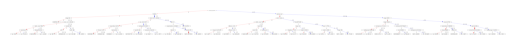

In [18]:
#Tree thinking (same issue as before about how to read this info)
plt.figure(figsize=(100, 100))
plot_tree(model, num_trees=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

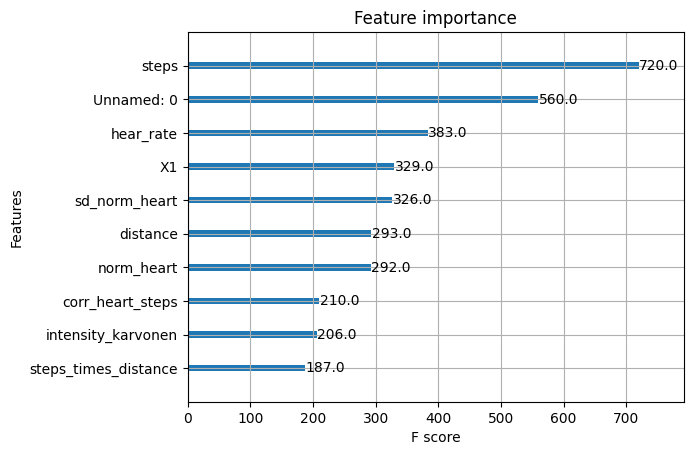

In [19]:
# Feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10) 
plt.show()


I want to focus here since the main variables now are quite predictable as well for the task but the fact that here the Brand of the device is not mentioned may mean that in the previous task the problem was regarding the algorithm that each brand has developed to classify the activity based on the data collected (So i can suppose that the dataset provided was just a small batch extracted by the sportwatchs database, so each data was not checked manually about the truth of the info provided, and that was the problem that was missleading our model)


I hope this notebook will help to understand how much the quality of the data matter, more than the analysis itself and also acknowledge the device user about the imperfections regarding the measure taken and algorithms created by cheap brand sportwear